In [1]:
from wildlife_datasets import datasets
from wildlife_tools.data.dataset import WildlifeDataset
from wildlife_tools.data.split import SplitMetadata

import pandas as pd
import matplotlib.pyplot as plt

c:\Users\Viktor\anaconda3\envs\wildlife-tools-dev\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Pick the degrdation settings

### Gaussian Blur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05532719..1.1498019].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04565432..1.1415316].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.012430161..1.144086].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.016909257..1.1325958].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.008122101..1.0860705].


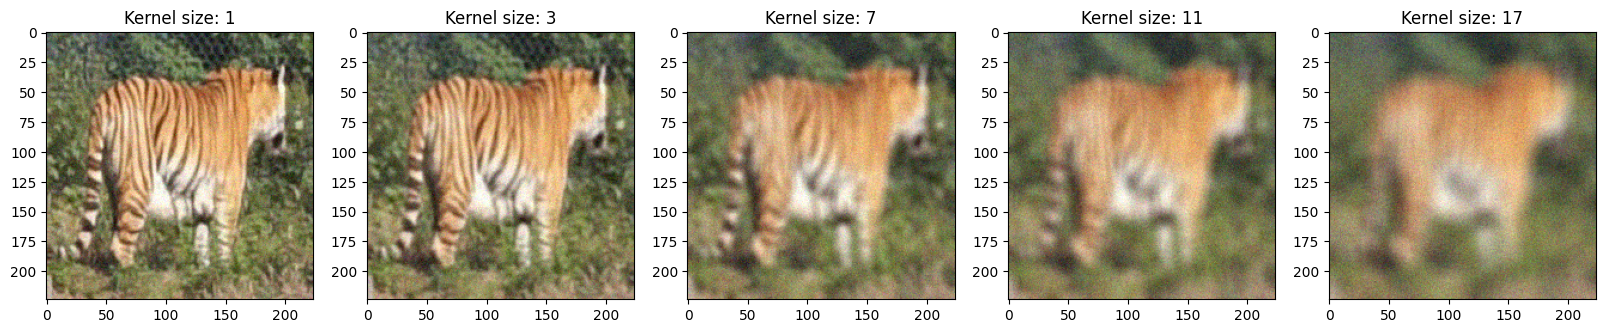

In [6]:
import torchvision.transforms as T
from degradations import GaussianNoise

root_images = '../tdq_datasets_256/images'
root_metadata = '../tdq_datasets_256/metadata'

dataset_name = 'ATRW'

metadata = pd.read_csv(f'{root_metadata}/{dataset_name}/metadata.csv', index_col=0)

kernel_sizes = [1, 3, 7, 11, 17]

# Make an image grid
fig, ax = plt.subplots(1, len(kernel_sizes), figsize=(20, 10))

for i, ks in enumerate(kernel_sizes):
    transform = T.Compose([
        T.Resize(size=(224, 224)),
        T.ToTensor(),
        T.GaussianBlur(kernel_size=ks, sigma=10),
        GaussianNoise(mean=0, std=0.05, p=1),
        # T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])

    query_dataset = WildlifeDataset(
        metadata = metadata, 
        root = f'{root_images}/{dataset_name}',
        split = SplitMetadata('split', 'query'),
        transform=transform
    )

    image, label = query_dataset[100]

    ax[i].imshow(image.permute(1, 2, 0))
    ax[i].set_title(f'Kernel size: {ks}')
    

### Motion Blur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07932635..1.1599711].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.061363548..1.1305387].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.120700754..1.1255143].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08829679..1.1074681].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07152338..1.0896391].


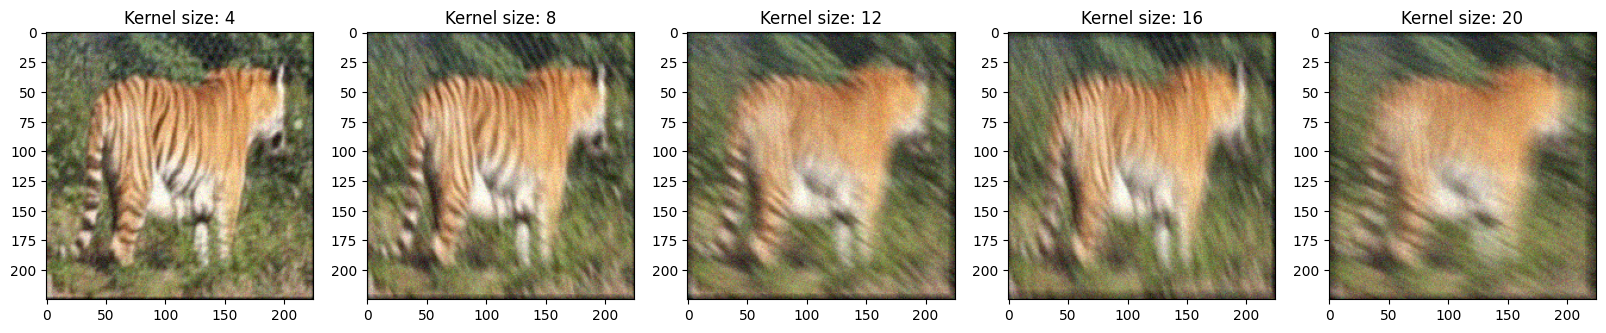

In [10]:
import torchvision.transforms as T
from degradations import RandomMotionBlur

root_images = '../tdq_datasets_256/images'
root_metadata = '../tdq_datasets_256/metadata'

dataset_name = 'ATRW'

metadata = pd.read_csv(f'{root_metadata}/{dataset_name}/metadata.csv', index_col=0)

kernel_sizes = [4, 8, 12, 16, 20]

# Make an image grid
fig, ax = plt.subplots(1, len(kernel_sizes), figsize=(20, 10))

for i, ks in enumerate(kernel_sizes):
    transform = T.Compose([
        T.Resize(size=(224, 224)),
        T.ToTensor(),
        RandomMotionBlur(ks=ks),
        GaussianNoise(mean=0, std=0.05, p=1),
        # T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])

    query_dataset = WildlifeDataset(
        metadata = metadata, 
        root = f'{root_images}/{dataset_name}',
        split = SplitMetadata('split', 'query'),
        transform=transform
    )

    image, label = query_dataset[100]

    ax[i].imshow(image.permute(1, 2, 0))
    ax[i].set_title(f'Kernel size: {ks}')
    

### Simple Circular Out-of-focus Blur

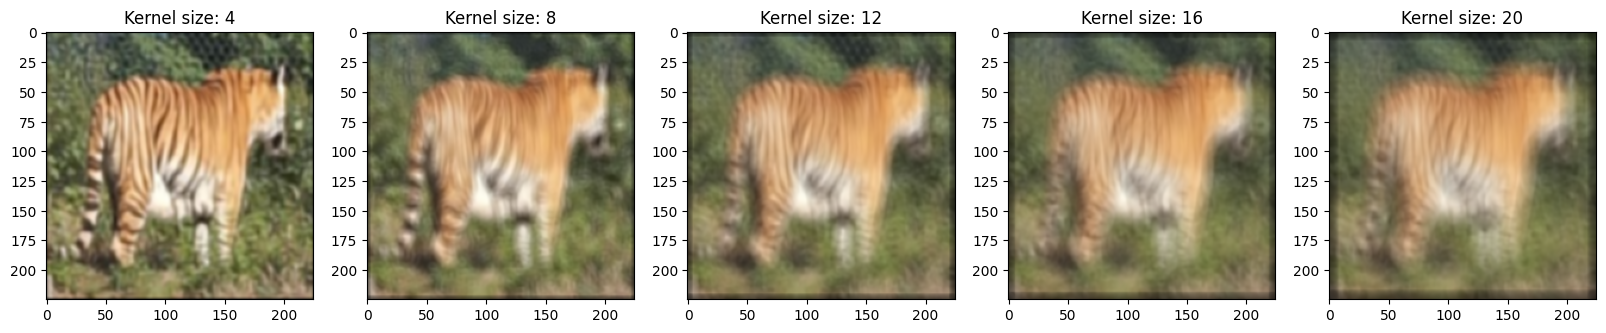

In [11]:
import torchvision.transforms as T
from degradations import CircularPSFBlur

root_images = '../tdq_datasets_256/images'
root_metadata = '../tdq_datasets_256/metadata'

dataset_name = 'ATRW'

metadata = pd.read_csv(f'{root_metadata}/{dataset_name}/metadata.csv', index_col=0)

kernel_sizes = [4, 8, 12, 16, 20]

# Make an image grid
fig, ax = plt.subplots(1, len(kernel_sizes), figsize=(20, 10))

for i, ks in enumerate(kernel_sizes):
    transform = T.Compose([
        T.Resize(size=(224, 224)),
        T.ToTensor(),
        CircularPSFBlur(kernel_size=ks),
        #GaussianNoise(mean=0, std=0.05, p=1),
        # T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])

    query_dataset = WildlifeDataset(
        metadata = metadata, 
        root = f'{root_images}/{dataset_name}',
        split = SplitMetadata('split', 'query'),
        transform=transform
    )

    image, label = query_dataset[100]

    ax[i].imshow(image.permute(1, 2, 0))
    ax[i].set_title(f'Kernel size: {ks}')

### GG PSF Blur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.05526592..1.0000002].


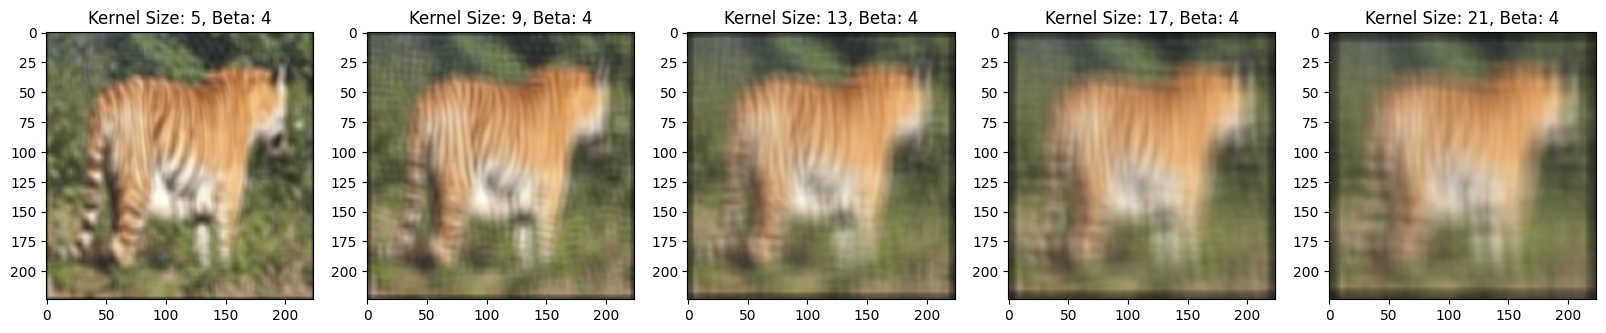

In [14]:
import torchvision.transforms as T
from degradations import GGPSFBlur

root_images = '../tdq_datasets_256/images'
root_metadata = '../tdq_datasets_256/metadata'

dataset_name = 'ATRW'

metadata = pd.read_csv(f'{root_metadata}/{dataset_name}/metadata.csv', index_col=0)

kernel_sizes = [5, 9, 13, 17, 21]

# Make an image grid
fig, ax = plt.subplots(1, len(kernel_sizes), figsize=(20, 10))

for i in range(len(kernel_sizes)):
    transform = T.Compose([
        T.Resize(size=(224, 224)),
        T.ToTensor(),
        GGPSFBlur(kernel_size=kernel_sizes[i], beta=4),
        #GaussianNoise(mean=0, std=0.05, p=1),
        # T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])

    query_dataset = WildlifeDataset(
        metadata = metadata, 
        root = f'{root_images}/{dataset_name}',
        split = SplitMetadata('split', 'query'),
        transform=transform
    )

    image, label = query_dataset[100]

    ax[i].imshow(image.permute(1, 2, 0))
    ax[i].set_title(f'Kernel Size: {kernel_sizes[i]}, Beta: 4')

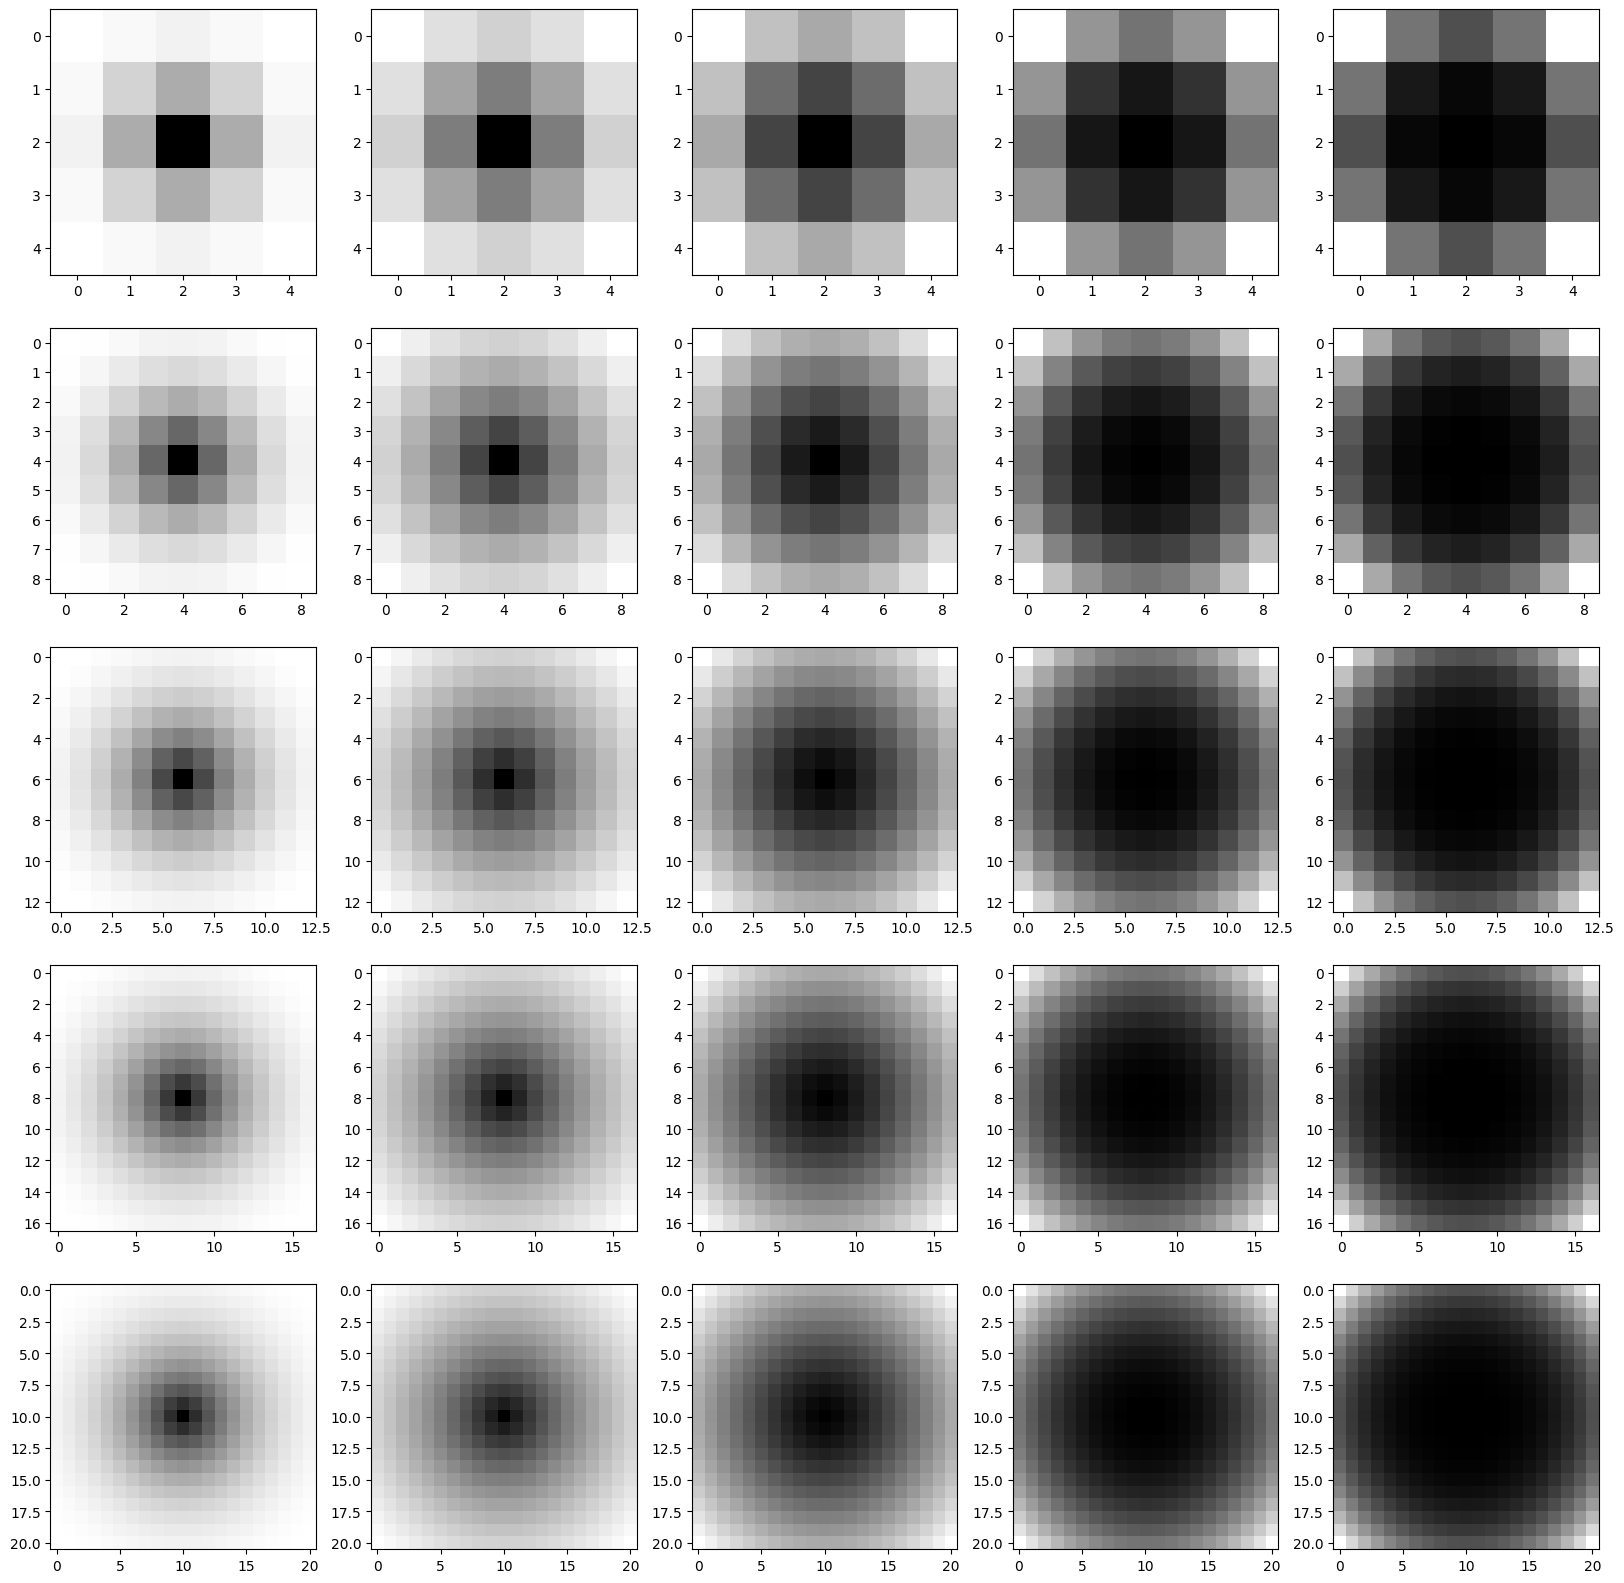

In [15]:
kernel_sizes = [5, 9, 13, 17, 21]
betas = [1, 2, 3, 4, 5]

# Plot the different combinations of kernels
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i, k in enumerate(kernel_sizes):
    for j, b in enumerate(betas):
        blur = GGPSFBlur(kernel_size=k, beta=b)

        kernel = blur.generate_gg_psf().squeeze(0, 1)

        ax[i, j].imshow(kernel, cmap='gray')


### JPEG Artifacts

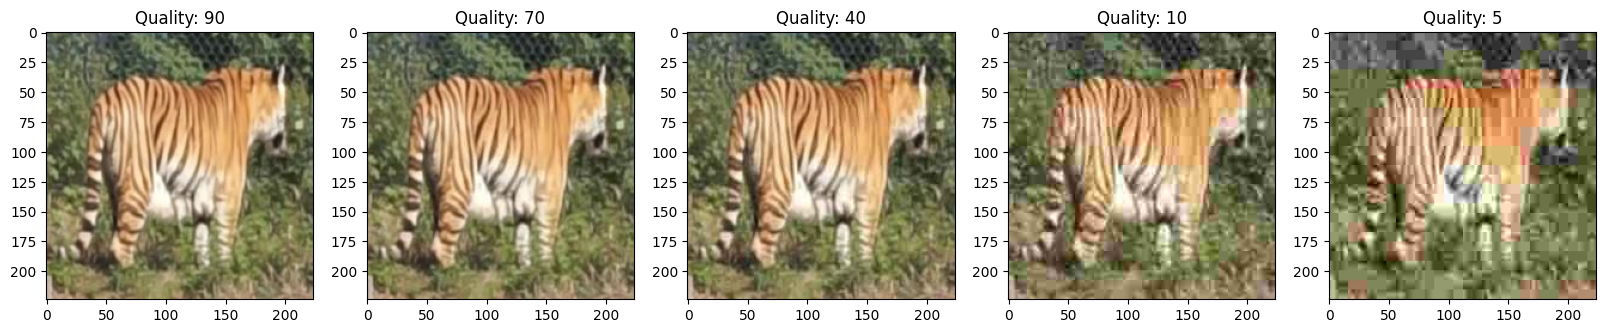

In [15]:
import torchvision.transforms as T
from degradations import JPEGArtifacts

root_images = '../tdq_datasets_256/images'
root_metadata = '../tdq_datasets_256/metadata'

dataset_name = 'ATRW'

metadata = pd.read_csv(f'{root_metadata}/{dataset_name}/metadata.csv', index_col=0)

qualities = [90, 70, 40, 10, 5]

# Make an image grid
fig, ax = plt.subplots(1, len(qualities), figsize=(20, 10))

for i, q in enumerate(qualities):
    transform = T.Compose([
        T.Resize(size=(224, 224)),
        T.ToTensor(),
        JPEGArtifacts(quality=q),
        #GaussianNoise(mean=0, std=0.05, p=1),
        # T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])

    query_dataset = WildlifeDataset(
        metadata = metadata, 
        root = f'{root_images}/{dataset_name}',
        split = SplitMetadata('split', 'query'),
        transform=transform
    )

    image, label = query_dataset[100]

    ax[i].imshow(image.permute(1, 2, 0))
    ax[i].set_title(f'Quality: {q}')